In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
from ogb.nodeproppred import DglNodePropPredDataset
from umap import UMAP

In [3]:
dataset = DglNodePropPredDataset('ogbn-mag', root='/home/ksadowski/datasets')
g = dataset[0][0]

predict_category = 'paper'

split_idx = dataset.get_idx_split()
train_idx = split_idx['train'][predict_category].numpy()
valid_idx = split_idx['valid'][predict_category].numpy()
test_idx = split_idx['test'][predict_category].numpy()

X = g.ndata['feat'][predict_category].numpy()

In [ ]:
# reducer = TSNE(random_state=13)
reducer = UMAP(random_state=13)

X_embedded = reducer.fit_transform(X)

# np.save('./tsne_embedding.npy', X_embedded)
np.save('./umap_embedding.npy', X_embedded)

In [8]:
# X_embedded = np.load('./tsne_embedding.npy')
# X_embedded = np.load('./umap_embedding.npy')

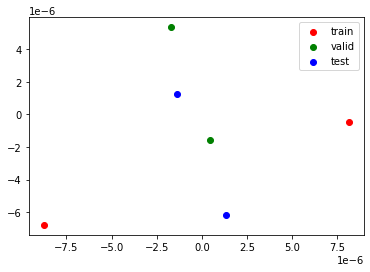

In [12]:
plt.figure()

plt.scatter(X_embedded[train_idx][0], X_embedded[train_idx][1], c='r', label='train')
plt.scatter(X_embedded[valid_idx][0], X_embedded[valid_idx][1], c='g', label='valid')
plt.scatter(X_embedded[test_idx][0], X_embedded[test_idx][1], c='b', label='test')

plt.legend()
plt.show()